# Part 5: Statistics and Regression
by Leslie Kerby with some material adapted from Berkeley Data Science

## 1. Probability and Statistics (Optional)
After a long day of class, Philip decides to go to Burger Fin for dinner. Today's menu has Philip's four favorite foods: enchiladas, hamburgers, pizza, and spaghetti. However, each dish has a 30% chance of running out before Philip can get to Burger Fin.

**Question 3.1** <br/>What is the probability that Philip will be able to eat pizza at Burger Fin?

In [ ]:
...

**Question 3.2** <br/>What is the probability that Philip will be able to eat all four of these foods at Burger Fin?

In [ ]:
...

**Question 3.3** <br/>What is the probability that Burger Fin will have run out of something before Philip can get there?

In [ ]:
...

To make up for their unpredictable food supply, Burger Fin decides to hold a contest for some free Dining swag. There is a bag with two red marbles, two green marbles, and two blue marbles. Philip has to draw three marbles separately. In order to win, all three of these marbles must be of different colors.

**Question 3.4** <br/>What is the probability of Philip winning the contest?

In [ ]:
...

### 1.1 Mean and Standard Deviation

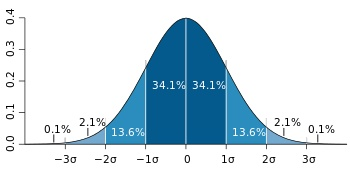

The sample mean is the average of a sample and is represented by $\bar{x}$.
<p style="text-align: center;">
$\bar{x} = \frac{1}{N}\sum{x_i}$
</p>

The sample mean is often used to estimate the mean of the population, $\mu$. The sample standard deviation measures how 'spread out' the sample is, and is represented by $s$. 
<p style="text-align: center;">
$s = \sqrt{\frac{1}{N-1}\sum{(x_i - \bar{x})^2} }$
</p>
Assuming a Gaussian distribution, with a mean of zero, 68.2% of the sample will lie inside one standard deviation, 95.4% will lie inside two standard deviations, and 99.8% will lie inside three standard deviations. The population standard deviation is denoted by $\sigma$. Variance is the square of the standard deviation.

Some samples are very spread out, some are close together. The cell below creates a sample with a 'normal' standard deviation of 1. 

In [ ]:
x = np.random.normal(0,1,10000)
plt.hist(x, bins = 100, range=(-5,5))

This cell creates a sample with half the standard deviation (0.5).

In [ ]:
x = np.random.normal(0,.5,10000)
plt.hist(x, bins = 50, range=(-5, 5))

This cell creates a sample with twice the 'normal' standard deviation (2).

In [ ]:
x = np.random.normal(0,2,10000)
plt.hist(x, bins = 50, range=(-5, 5))

### 1.2 Correlation
Correlation studies the relationship between two variables. The correlation coefficient measures the strength of the linear relationship between two variables. Graphically, it measures how clustered the scatter diagram is around a straight line.

The term correlation coefficient isn’t easy to say, so it is usually shortened to correlation and denoted by $r$.

Here are some mathematical facts about $r$ that we will just observe by simulation.
- The correlation coefficient $r$ is a number between $-1$ and $1$.
- $r$ measures the extent to which the scatter plot clusters around a straight line.
- $r = 1$ if the scatter diagram is a perfect straight line sloping upwards, and $r = -1$ if the scatter diagram is a perfect straight line sloping downwards.

Let's look at some examples.

In [ ]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

plt.scatter(x, y)

In [ ]:
# Calculate the Pearson correlation coefficient, with the p-value
from scipy.stats import pearsonr
pearsonr(x, y)

**p-value**<br/>
We haven't had time to discuss hypothesis testing. But briefly, when you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. The p-value is a number between 0 and 1 and interpreted in the following way: A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. A p-value of 0.05 indicates that 5% of the time your results could have happened by chance, but 95% of the time it is not chance.

In [ ]:
# You can also create a correlation matrix with Numpy
# | x,x | x,y |
# | y,x | y,y |
np.corrcoef(x, y)

In [ ]:
# An example with lower r
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 50, 1000)

plt.scatter(x, y)

In [ ]:
pearsonr(x, y)

In [ ]:
# An example with no correlation (r is about zero)
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = np.random.normal(0, 50, 1000)

plt.scatter(x, y)

In [ ]:
pearsonr(x,y)

In [ ]:
# And lastly, negative r
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = -x + np.random.normal(0, 10, 1000)

plt.scatter(x, y)

In [ ]:
pearsonr(x,y)

**Association is not Causation**<br/>
Correlation only measures association. Correlation does not imply causation. Though the correlation between the weight and the math ability of children in a school district may be positive, that does not mean that doing math makes children heavier or that putting on weight improves the children’s math skills. Age is a confounding variable: older children are both heavier and better at math than younger children, on average.

**Correlation Measures Linear Association**<br/>
Correlation measures only one kind of association – linear. Variables that have strong non-linear association might have very low correlation. For example, variables can have a perfect quadratic relation $y = x^2$ but have correlation equal to 0.

**Correlation is Affected by Outliers**<br/>
Outliers can have a big effect on correlation. 

**Chocolate makes you smart?**<br/>
In 2012, a paper in the respected New England Journal of Medicine examined the relation between chocolate consumption and Nobel Prizes in a group of countries. The Scientific American responded seriously whereas others were more relaxed. You are welcome to make your own decision! The following graph, provided in the paper, should motivate you to go and take a look.

http://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20%28NEJM%29.pdf

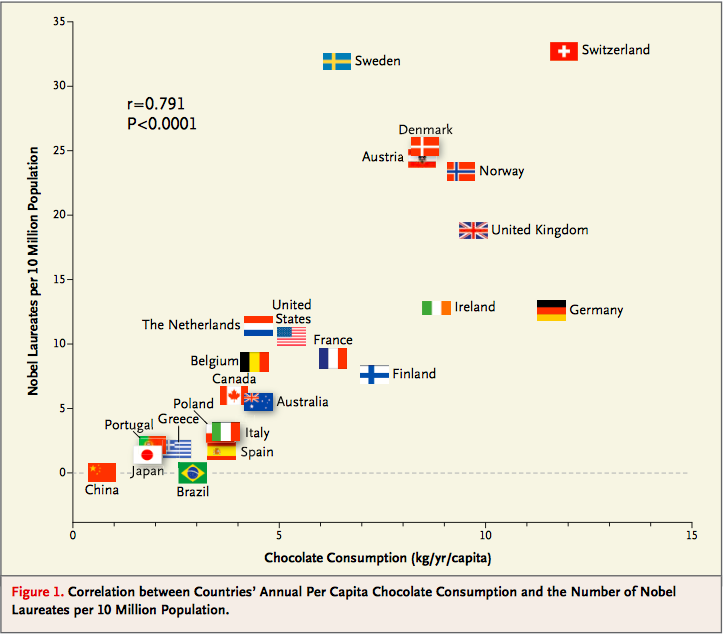

## 2. Regression (Statistics)
An important aspect of data science is to find out what data can tell us about the future. What do data about climate and pollution say about temperatures a few decades from now? Based on a person’s internet profile, which websites are likely to interest them? How can a patient’s medical history be used to judge how well he or she will respond to a treatment?

To answer such questions, data scientists have developed methods for making predictions. In this Example we will study one of the most commonly used ways of predicting the value of one variable based on the value of another: regression.

The foundations of regression were laid by Sir Francis Galton. Galton studied how physical characteristics are passed down from one generation to the next. Among his best known work is the prediction of the heights of adults based on the heights of their parents. We have studied the dataset that Galton collected for this. The table heights contains his data on the midparent height and child’s height (all in inches) for a population of 934 adult “children”.

In [ ]:
import numpy as np
import pandas as pd

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
heights = pd.read_csv('https://gitlab.com/CEADS/DrKerby/python/raw/master/galton.csv')
heights.head()

In [ ]:
heights.hist('childHeight')

In [ ]:
heights.plot.scatter('midparentHeight','childHeight')

It appears from the scatter plot that the taller the parents are, the taller the children, or the parents' and child's heights are correlated.

Now for the mean and standard deviation of our sample of adult children heights:

In [ ]:
child_mean = heights['childHeight'].mean()
child_mean

In [ ]:
child_std = heights['childHeight'].std()
child_std

The average adult child's height is 66.75 inches, with a standard deviation of 3.579 inches. (ie we would expect that 68.2% of the adult children have a height between 63.17 and 70.329 inches.

In [ ]:
# And finally! The correlation coefficient between parents' heights and their children's heights.
from scipy.stats import pearsonr
pearsonr(heights['midparentHeight'],heights['childHeight'])

In [ ]:
import seaborn as sns
sns.regplot(x='midparentHeight', y='childHeight', data=heights)

In [ ]:
np.corrcoef(heights['midparentHeight'],heights['childHeight'])

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(heights['midparentHeight'],heights['childHeight'])
print( 'y={:.2f}x+{:.2f}'.format(slope,intercept) )
r_value

**Question 2.1**<br/> Use the regression equation to make predictions of the `childHeight` given `midparentHeight`. Add these predictions as a new column in the DataFrame labeled `Predicted`. 

In [ ]:
...

**Question 2.2**<br/>
The residual, loosely speaking, is the error, and in this case is `Predicted` - `childHeight`. Find the residuals, and add them as a new column named `Residuals`.

In [ ]:
...

**Question 2.3**<br/>
Now let's say we want to find some average measure of the error in our predictive model. Find the `mean` of our residuals.

In [ ]:
...

Why is this close to zero?

We need to take the absolute value, or something, so that symmetrical errors do not cancel each other out. We most commonly do this by taking the square of the residuals. 

**Root Mean Squared Error**<br/>
The Root Mean Squared Error is calculated as
<p style="text-align: center;">
$RMSE = \sqrt{ \frac{1}{N}\sum{\epsilon_i^2} }$
</p>

**Question 2.4**<br/>
Find the RMSE for the residuals of our linear regression model.

In [ ]:
...

Linear Regression (the least squares variety at least) chooses the best-fit line as the line which minimizes this error.